In [2]:
#load the dataset direct dataset
from tensorflow import keras 

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train[1000]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.38039216, 0.32941176, 0.38039216, 0.43137255,
        0.42352941, 0.34117647, 0.38039216, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0745098 , 1.        , 0.78039216, 0.71764706, 0.55686275,
        0.63137255, 0.78431373, 0.83529412, 0.1254902 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.28235294, 0.68235294, 0.67843137, 0.61960784, 0.51372549,
        0.51764706, 0.6901

In [ ]:
x_train[0] # it shows the complete pixel value of the image 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
#VISUALIZATION OF THE DATA
def visualize_input(img,ax):
  ax.imshow(img, cmap='gray')
  width, height = img.shape
  thresh = img.max()/2.5
  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                  horizontalalignment ='center',
                  verticalalignment ='center',
                  color='white' if img[x][y]<thresh else 'black')

<function matplotlib.pyplot.show>

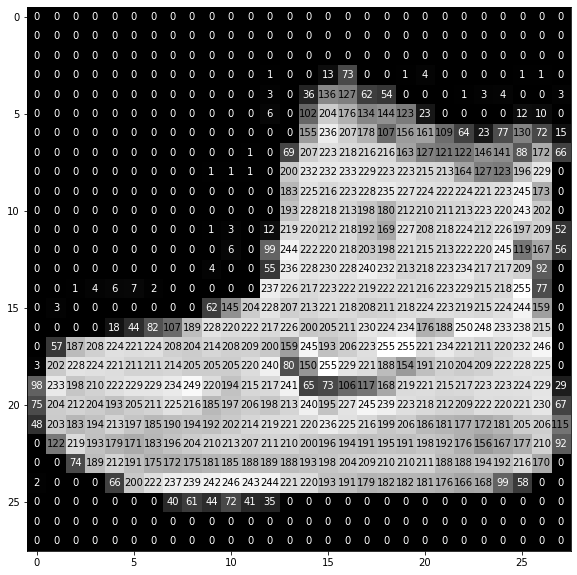

In [ ]:
#VISUALIZATION OF THE DATA
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
visualize_input(x_train[0],ax)
plt.show

In [ ]:
print(y_train)
print(y_test)


[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


In [ ]:
#labelling the data as it is displayed in numerics
label = "T-shirt/top Trouser Pullover Dress Coat Sandal Shirt Sneaker Bag Ankle-boot"
label = label.split()
label

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle-boot']

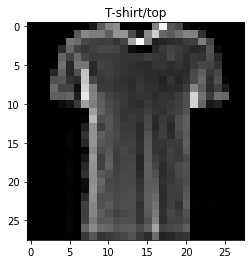

In [ ]:
import random
import matplotlib.pyplot as ply
i = random.randint(0,60000)
plt.imshow(x_train[i],cmap='gray')
plt.title(label[y_train[i]])
plt.show()

In [ ]:
#how many images are there in every digit?
import numpy as np
np.unique(y_train,return_counts=True)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [ ]:
#NORMALIZATION :scaling down the value to a specific range(0-1)
x_train = x_train/255
x_test = x_test/255

In [ ]:
#after normalization
print(x_train.max())
print(x_test.min())

1.0
0.0


In [ ]:
#creating a simple neyral network architecture 
#classification - multiclass 
#activation function for output layer = softmax(multiclass classification
#since we have images (matrix format) we use flatten as input layer
#sparse categorical (lot of zeros )(one hot encoding)-all the values will be represented in alist of havingindex value as zero
#if o/p in form integer - use sparse categorial entropy
#if o/p in form of[0,0,0,0,0,0,0,0,1,0,0] - use categorical


In [ ]:
from keras.layers import Dense
from keras.layers import Flatten
model = keras.Sequential()
model.add(Flatten(input_shape=(28,28))) #784
model.add(Dense(392,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
# neurons in hidden layer =10-784
784/2

392.0

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)
#history will help us plot the graph easily

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4972 - accuracy: 0.8246 - val_loss: 0.4065 - val_accuracy: 0.8515
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3732 - accuracy: 0.8636 - val_loss: 0.4000 - val_accuracy: 0.8522
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3347 - accuracy: 0.8769 - val_loss: 0.3310 - val_accuracy: 0.8802
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3062 - accuracy: 0.8872 - val_loss: 0.3298 - val_accuracy: 0.8822
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2869 - accuracy: 0.8930 - val_loss: 0.3148 - val_accuracy: 0.8851
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2713 - accuracy: 0.8982 - val_loss: 0.3314 - val_accuracy: 0.8833
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2576 - accuracy: 0.9045 - val_loss: 0.3226 - val_accuracy:

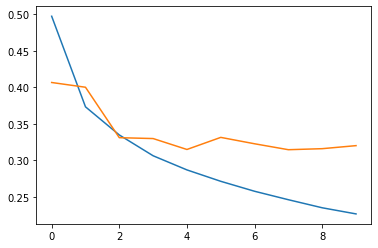

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

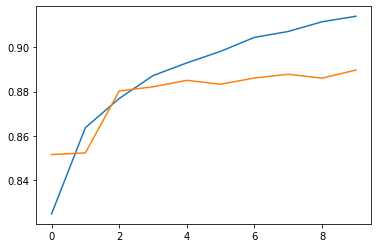

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
#evaluate on test data
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_pred,y_test)

array([[790,   6,  10,  11,   1,   0,  87,   0,   5,   0],
       [  0, 957,   0,   1,   0,   0,   0,   0,   0,   0],
       [ 13,   2, 803,   6, 105,   0,  80,   0,   3,   0],
       [ 37,  25,  16, 914,  33,   0,  38,   0,   4,   0],
       [  6,   3,  86,  37, 809,   0,  78,   0,   2,   0],
       [  0,   0,   0,   0,   0, 958,   0,   4,   1,  12],
       [149,   5,  83,  27,  50,   0, 706,   0,   6,   1],
       [  0,   0,   0,   0,   0,  30,   0, 970,   4,  40],
       [  5,   2,   2,   4,   2,   1,  11,   1, 975,   0],
       [  0,   0,   0,   0,   0,  11,   0,  25,   0, 947]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       910
           1       0.96      1.00      0.98       958
           2       0.80      0.79      0.80      1012
           3       0.91      0.86      0.88      1067
           4       0.81      0.79      0.80      1021
           5       0.96      0.98      0.97       975
           6       0.71      0.69      0.70      1027
           7       0.97      0.93      0.95      1044
           8       0.97      0.97      0.97      1003
           9       0.95      0.96      0.96       983

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
accuracy_score(y_pred,y_test)

0.8829

In [ ]:
#batch normalization - it normalizez at every layer 

In [ ]:
# moddel saving: .h5 (heirarichal format)
# or .hdf5

In [ ]:
model.save('fashion_mnist.hdf5')
# we are saving the model parameters (weights and bias ) and model architecture